In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('Customers.csv')
# dataset = dataset_original.copy()
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (kRs),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.info()
print('Dataset shape: ', dataset.shape, sep="") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (kRs)     200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Dataset shape: (200, 5)


In [4]:
# Finding if there are null values in the dataset
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (kRs)       0
Spending Score (1-100)    0
dtype: int64

In [5]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (kRs),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Discard CustomerID
colsToDrop = ['CustomerID', 'Genre', 'Age']
dataset = dataset.drop(colsToDrop, axis=1)

In [7]:
X = dataset.iloc[:, [0,1]].values

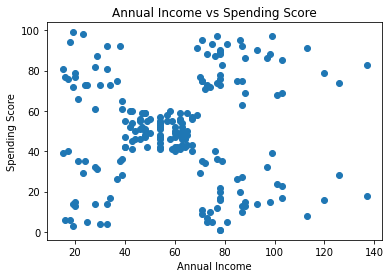

In [8]:
# assign x1 as Annual Income col
x1 = dataset.iloc[:,0]
# assign x1 as Spending Score col
x2 = dataset.iloc[:,1]
plt.figure()
plt.title('Annual Income vs Spending Score')
plt.scatter(x1, x2)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [9]:
from sklearn.cluster import KMeans
# Empty array to store kmeans.inertia_ 
# kmeans.inertia_ is Sum of squared distances of samples to their closest cluster center.
wcss = []  # wcss : distortion or variance
# max value of clusters is 10
for x in range(1, 11):
    print("Number of cluster = ", x, sep="")
    kmeans = KMeans(n_clusters = x, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    print("kmeans.inertia_ = ", kmeans.inertia_, sep="")
    wcss.append(kmeans.inertia_)
print(wcss)

Number of cluster = 1
kmeans.inertia_ = 269981.28000000014
Number of cluster = 2
kmeans.inertia_ = 181363.59595959607
Number of cluster = 3
kmeans.inertia_ = 106348.37306211119
Number of cluster = 4
kmeans.inertia_ = 73679.78903948837
Number of cluster = 5
kmeans.inertia_ = 44448.45544793369
Number of cluster = 6
kmeans.inertia_ = 37265.86520484345
Number of cluster = 7
kmeans.inertia_ = 30241.34361793659
Number of cluster = 8
kmeans.inertia_ = 25336.94686147186
Number of cluster = 9
kmeans.inertia_ = 21850.16528258562
Number of cluster =10
kmeans.inertia_ = 19634.554629349972
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30241.34361793659, 25336.94686147186, 21850.16528258562, 19634.554629349972]


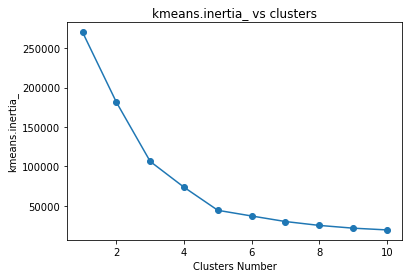

In [10]:
plt.figure()
plt.title('kmeans.inertia_ vs clusters')
plt.scatter(range(1, 11), wcss)
plt.plot(range(1, 11), wcss)
plt.xlabel('Clusters Number')
plt.ylabel('kmeans.inertia_')
plt.show()
# Cluster should be set to 5

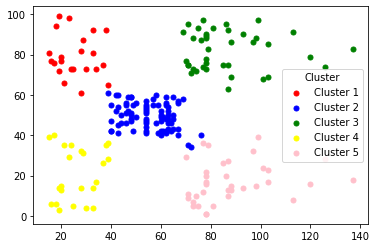

In [11]:
# Setting the value of clusters, k to 5
k = 5
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42).fit_predict(X)
plt.scatter(X[kmeans==0,0], X[kmeans==0,1], s=25, c ='red', label='Cluster 1')
plt.scatter(X[kmeans==1,0], X[kmeans==1,1], s=25, c ='blue', label='Cluster 2')
plt.scatter(X[kmeans==2,0], X[kmeans==2,1], s=25, c ='green', label='Cluster 3')
plt.scatter(X[kmeans==3,0], X[kmeans==3,1], s=25, c ='yellow', label='Cluster 4')
plt.scatter(X[kmeans==4,0], X[kmeans==4,1], s=25, c ='pink', label='Cluster 5')
plt.legend(loc="best", title="Cluster")
plt.show()

In [12]:
newSet = pd.DataFrame(data=X, columns=['Annual Income', 'Spending Score'])
newSet['Cluster'] = kmeans

In [13]:
newSet.head(15)

,Annual Income,Spending Score,Cluster
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3
5,17,76,0
6,18,6,3
7,18,94,0
8,19,3,3
9,19,72,0


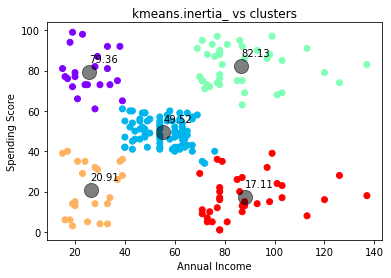

In [14]:
# Setting the value of clusters, k to 5
k = 5
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.figure()
plt.title('kmeans.inertia_ vs clusters')
plt.scatter(X[:,0],X[:,1], c=labels, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
for x,y in zip(centers[:, 0],  centers[:, 1]):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x, y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0, 10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()